<a href="https://colab.research.google.com/github/yuna1998/time_series/blob/main/Time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Consider the time series data shown in Table
# a) Make a time series plot of the data
y <- c(500, 496, 450, 448, 456, 458, 472, 495, 491, 488, 
508, 510, 512, 503,505, 494, 491, 487, 491, 486,
475, 485, 495, 500, 541, 555, 565, 601, 610, 605,
639, 679, 674, 677, 700, 704, 727, 736, 693, 650,
637, 606, 610, 620, 613, 593, 578, 581, 598, 613)

In [2]:
length(y)

[1] 50

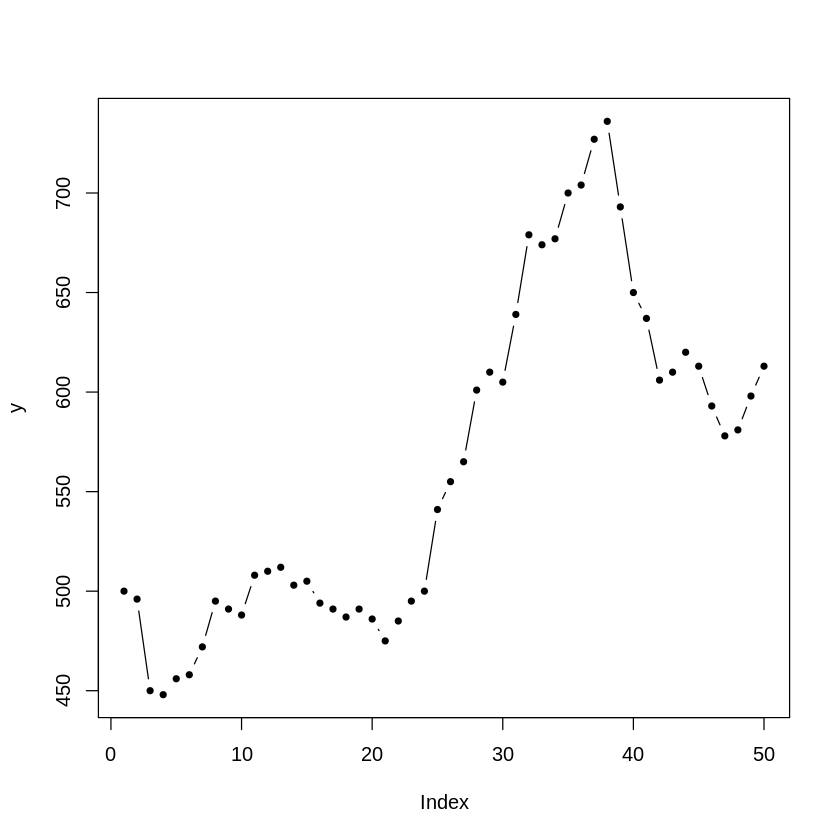

In [3]:
plot(y, type= "b", pch = 20)

In [4]:
## That is non-stationary
## b/c non-constant mean, unequal variance
## -> we have to deal with the unequal variances, so have to log transform

In [5]:
install.packages("forecast")
library(forecast)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [6]:
w <- log(y)

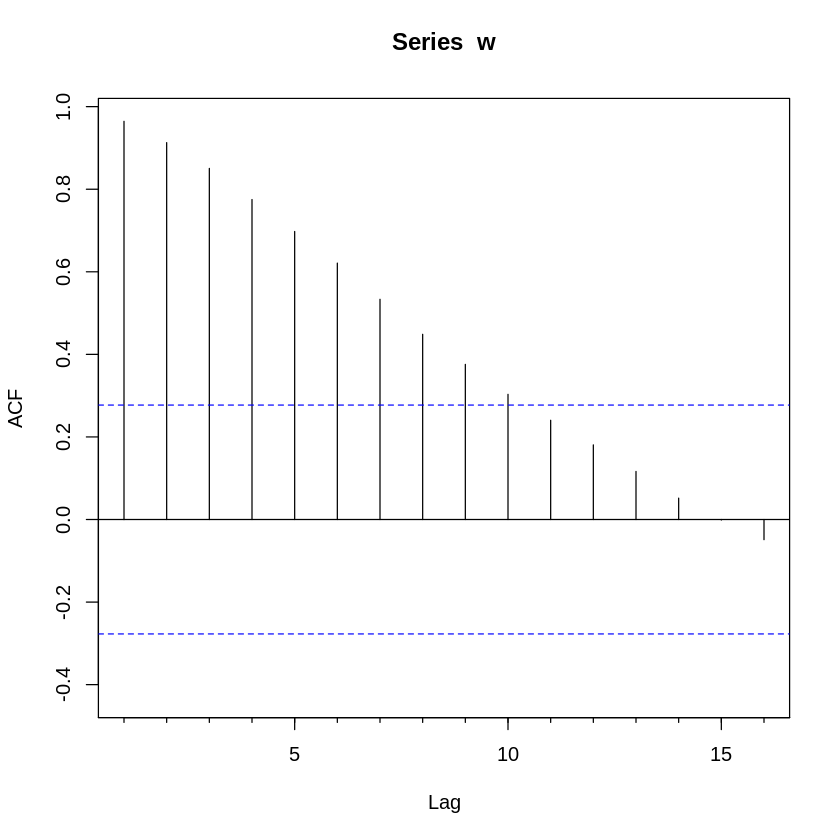

In [7]:
Acf(w, type = 'correlation', plot=T)

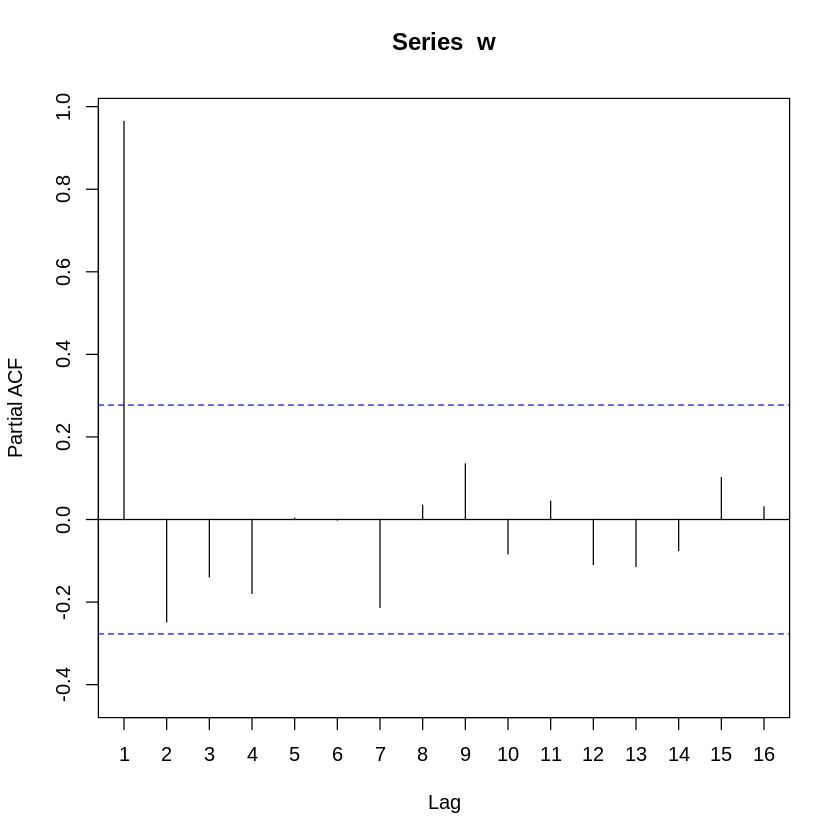

In [8]:
Acf(w, type = "partial", plot = T)

In [9]:
## the ACF plot shows a slowing decay. -> that is non-staionary 
## -> the time series data is a homogeneouse non-stationary data.
## we should apply ARIMA

In [10]:
install.packages("dplyr")
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




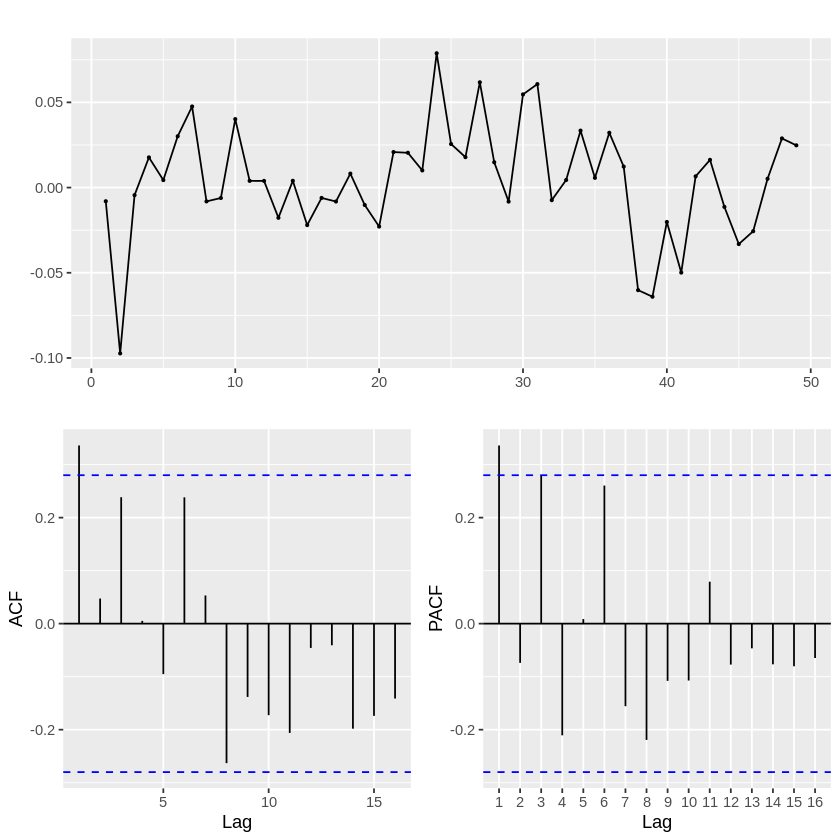

In [11]:
w %>% diff(1) %>% ggtsdisplay()

In [12]:
## To identify ARIMA(q,d,p) -> d = 1, ACF plot shows auto correlation value at lag 1 => q=1
## PACF plot shows partial auto correlation value at lag 1 => p = 1
## so ARIMA(1,1,1)

In [13]:
model <- Arima(w, order = c(1,1,1))
summary(model)

Series: w 
ARIMA(1,1,1) 

Coefficients:
          ar1     ma1
      -0.2175  0.6710
s.e.   0.2388  0.1794

sigma^2 estimated as 0.0009143:  log likelihood=102.79
AIC=-199.57   AICc=-199.04   BIC=-193.9

Training set error measures:
                      ME       RMSE        MAE        MPE      MAPE     MASE
Training set 0.003160407 0.02931565 0.02255468 0.04937647 0.3568927 0.931523
                    ACF1
Training set -0.01725772


	Ljung-Box test

data:  Residuals from ARIMA(1,1,1)
Q* = 13.013, df = 8, p-value = 0.1114

Model df: 2.   Total lags used: 10



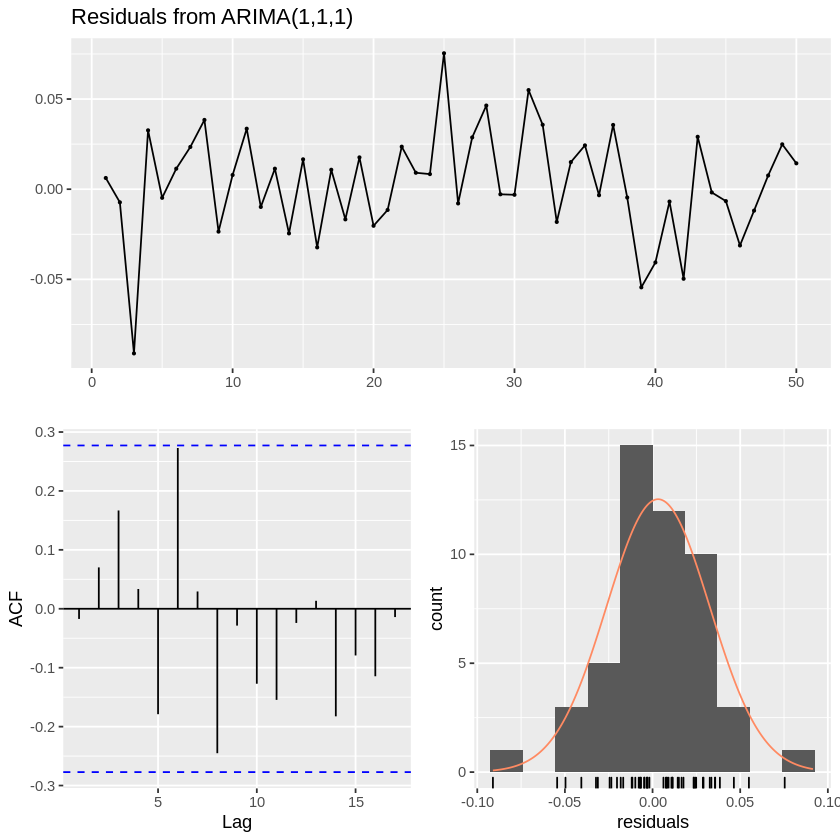

In [14]:
checkresiduals(model)

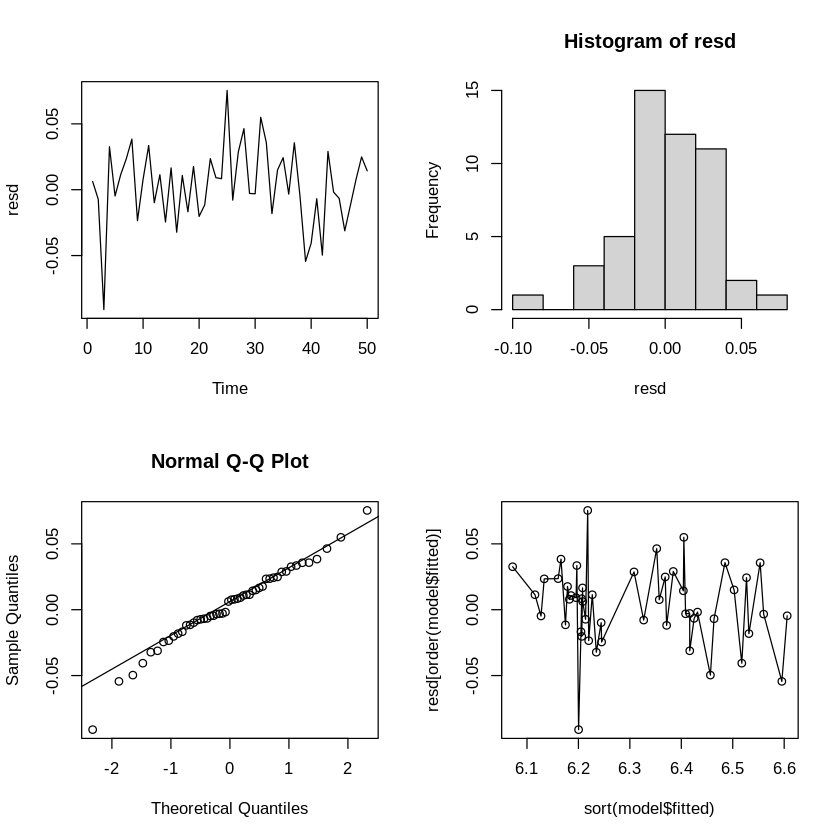

In [15]:
coef <- model$coef
resd <- model$residuals
par(mfrow = c(2,2))
plot(resd)
hist(resd)
qqnorm(resd); qqline(resd)
plot(sort(model$fitted), resd[order(model$fitted)])
lines(sort(model$fitted), resd[order(model$fitted)])

In [16]:
## According to Ljung-Box test, we can check the auto correlation in residuals.
## H0 : ~~~, p-value is 0.1114 -> cannot reject Ho, 
## The ACF plot shows that the autocorrelation is nor exist

In [17]:
forecast <- numeric()

In [18]:
forecast[1] = w[39]
forecast[2] = w[40]

In [19]:
for (i in 1 : 10){
    forecast[i+2] <- (1 + coef[1]) * forecast[i+1] - coef[1] * forecast[i] + coef[2] * resd[i+39]
}

In [20]:
forecast <- exp(forecast[-c(1,2)])

In [21]:
cbind(forecast = forecast, true = y[41:50])

forecast,true
641.3932,637
640.2955,606
619.5368,610
636.2801,620
631.8338,613
629.9997,593
617.3343,578
615.1380,581
618.7565,598
628.3694,613


In [22]:
sqrt( mean(forecast - y[41:50])^2)

[1] 22.99373

In [1]:
n_step <- 1 : 100
yhat <- numeric(); yhat[1] = 135
for ( i in 1:99){
    yhat[i+1] = 25 + 0.8 * yhat[i]
}
head(cbind(n_step, yhat))

n_step,yhat
1,135.0000
2,133.0000
3,131.4000
4,130.1200
5,129.0960
6,128.2768


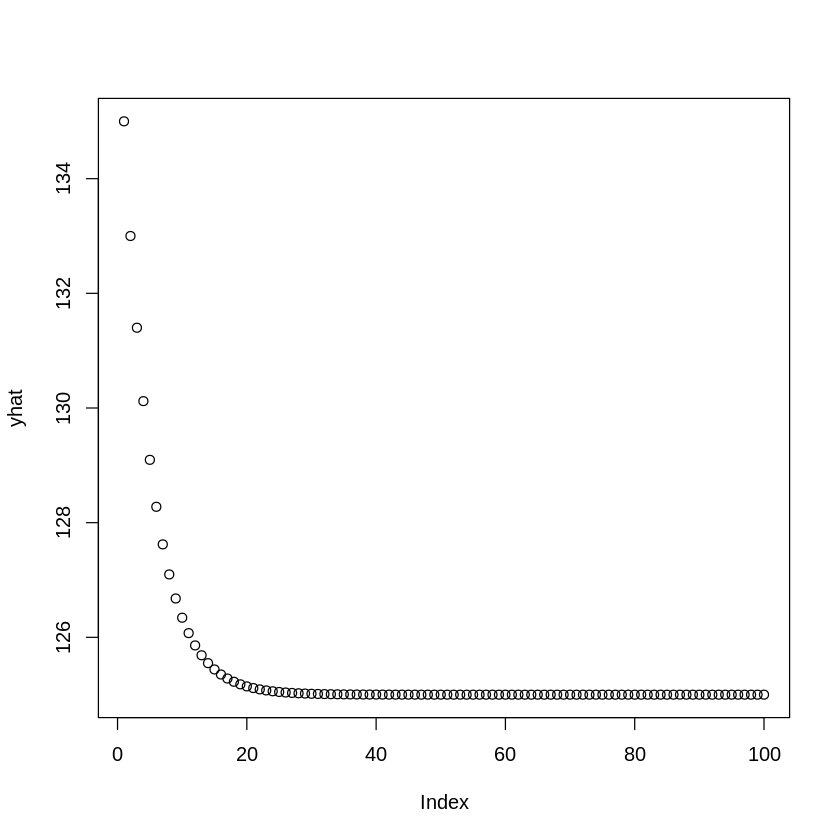

In [2]:
plot(yhat)

In [3]:
n_step <- 1 : 100
yhat <- numeric(); yhat[1] = 131.2
for ( i in 1:99){
    yhat[i+1] = 25 + 0.8 * yhat[i]
}
head(cbind(n_step, yhat))

n_step,yhat
1,131.2000
2,129.9600
3,128.9680
4,128.1744
5,127.5395
6,127.0316


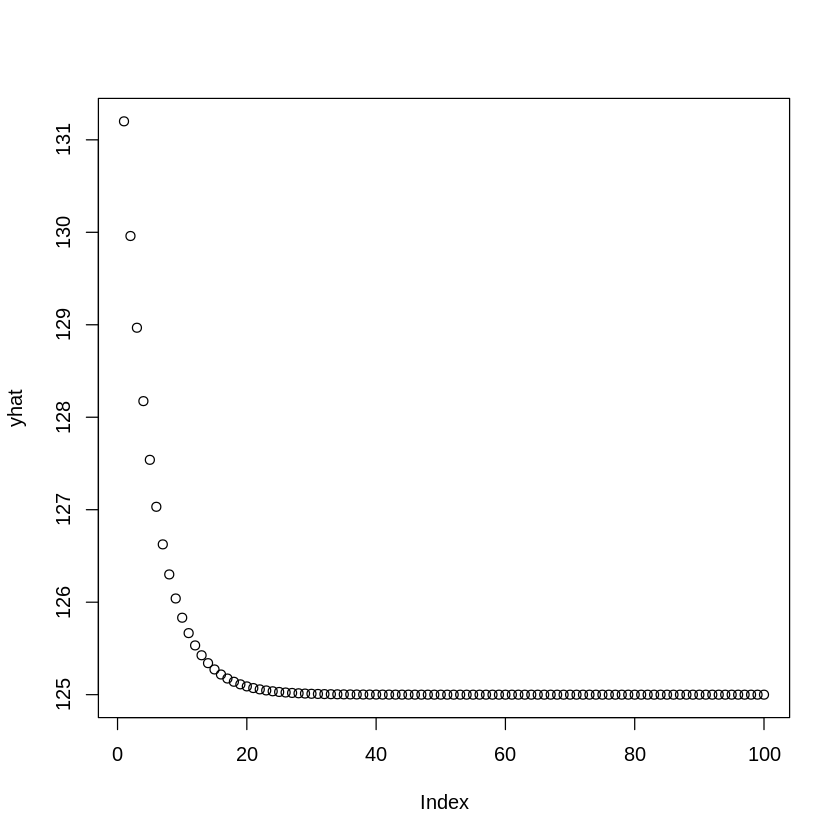

In [4]:
plot(yhat)